# Importing Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import DBSCAN
import warnings
import sys
import re
import altair as alt
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Data Preprocessing

In [179]:
df=pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [181]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [182]:
df['Age'].unique()

array([27, 35, 45, 41, 31, 28, 33, 34, 29, 30, 49, 26, 37, 36, 43, 42, 32,
       44, 39, 46, 50, 51], dtype=int64)

In [183]:
df['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [184]:
df['House Loan'].unique()

array(['No', 'Yes'], dtype=object)

In [185]:
df['Make'].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

In [186]:
df['Marrital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [187]:
df['No of Dependents'].unique()

array([0, 2, 4, 3], dtype=int64)

In [188]:
df['Personal loan'].unique()

array(['Yes', 'No'], dtype=object)

In [189]:
df['Price'].unique()

array([ 800000, 1000000, 1200000, 1600000,  700000, 1100000,  110000,
       3000000, 1300000, 1500000], dtype=int64)

In [190]:
df['Profession'].unique()

array(['Salaried', 'Business'], dtype=object)

In [191]:
df['Salary'].unique()

array([ 800000, 1400000, 1800000, 1600000,  900000, 1200000, 2000000,
       1300000, 2500000, 1700000, 1100000, 1900000, 2100000, 2400000,
       2200000,  200000, 1500000, 2700000, 2900000, 3100000, 2600000,
       2300000, 2800000, 3800000], dtype=int64)

In [192]:
df['Total Salary'].unique()

array([ 800000, 2000000, 1800000, 2200000, 2600000,  900000, 1400000,
       1900000, 1700000, 1300000, 4500000, 2500000, 2400000, 2900000,
       1600000, 2700000, 1100000, 2100000, 3000000, 3700000, 2300000,
       3600000,  200000, 3100000, 4300000, 3800000, 4700000, 1200000,
       1500000, 4000000, 3200000, 5200000, 4100000, 4900000, 2800000,
       5100000], dtype=int64)

In [193]:
df['Wife Salary'].unique()

array([      0,  600000,  800000,  700000,  400000, 2000000,  500000,
       1000000, 1100000,  900000, 1300000, 1400000, 1800000, 2100000],
      dtype=int64)

In [194]:
df['Wife Working'].unique()

array(['No', 'Yes', 'm'], dtype=object)

In [195]:
df['Wife Working'].replace(['m'], ['No'], inplace=True)

In [196]:
df['Wife Working'].unique()

array(['No', 'Yes'], dtype=object)

# Data Visualisation

In [197]:
def altair_dist(df, colname):
    name = ' '.join(re.findall('[A-Z][^A-Z]*', colname))
    hist = alt.Chart(df).mark_bar().encode(
        x=alt.X(
            shorthand=colname, 
            bin=alt.Bin(maxbins=20), 
            title=f"{name} (binned)"
        ),
        y=alt.Y(
            shorthand='count()', 
            title='No. of Cars'
        )
    ).properties(title=f'Histogram of {name}')

    box = alt.Chart(df).mark_boxplot().encode(
        x=alt.X(
            shorthand=colname,
            title=name
        )
    ).properties(title=f'Boxplot of {name}')

    return hist & box

In [198]:
(altair_dist(df, 'Age') | altair_dist(df, 'Salary')) &\
(altair_dist(df, 'Wife Salary') | altair_dist(df, 'Total Salary')) 

alt.VConcatChart(...)

In [199]:
brush = alt.selection(type='interval', resolve='global')

# common base for all subplots
base = alt.Chart(df).mark_point().encode(
    y=alt.Y('Price', title='Price'),
    color=alt.condition(
        brush, 
        'Make', 
        alt.ColorValue('black'), 
        legend=alt.Legend(orient="top"), 
        scale=alt.Scale(scheme='set1'),
    ), 
    tooltip='Make'
).add_selection(
    brush
).properties(
    width=350,
    height=250
)


In [200]:
x1 = alt.X('Age', title='Age')
x2 = alt.X('Salary', title='Salary')
x3 = alt.X('Wife Salary', title='Wife Salary')
x4 = alt.X('Total Salary', title='Total Salary')
x5 = alt.X('Education', title='Education')

# layout for subplots
(base.encode(x=x1) | base.encode(x=x2)) &\
(base.encode(x=x3) | base.encode(x=x4)) &\
(base.encode(x=x5))

alt.VConcatChart(...)

In [201]:
base = alt.Chart(df).mark_boxplot().encode(
    y=alt.Y('Price', title='Price'), 
    color=alt.Color(
        shorthand='Make', 
        scale=alt.Scale(scheme='set1'),
        legend=alt.Legend(orient="top"),
    )
).properties(
    width=250, 
    height=100
)

x1 = alt.X('Education') 
x2 = alt.X('Profession') 
x3 = alt.X('Marrital Status')
x4 = alt.X('No of Dependents')
x5 = alt.X('Wife Working')
x6 = alt.X('Personal loan')
x7 = alt.X('House Loan')

(base.encode(x=x1) | base.encode(x=x2)) &\
(base.encode(x=x3) | base.encode(x=x4)) &\
(base.encode(x=x5) | base.encode(x=x6)) &\
(base.encode(x=x7))

alt.VConcatChart(...)

<AxesSubplot:xlabel='Make', ylabel='count'>

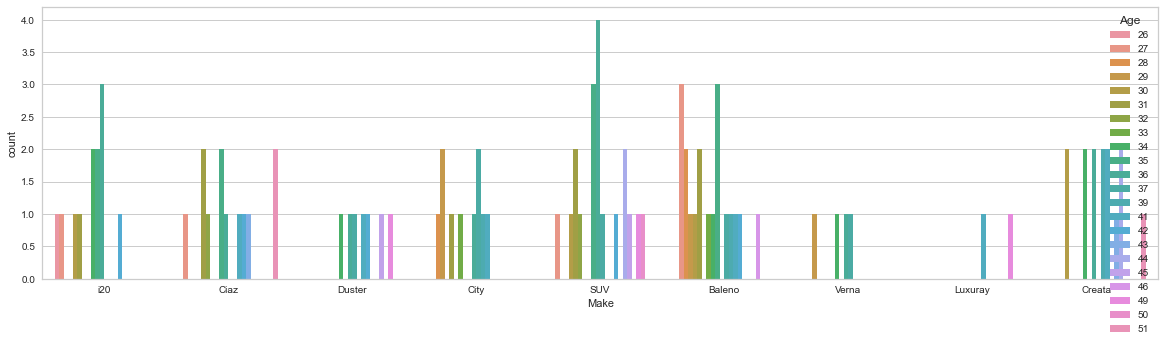

In [202]:
plt.figure(figsize=(20,5))
sns.countplot(x="Make", data=df, hue="Age")

<AxesSubplot:xlabel='Make', ylabel='count'>

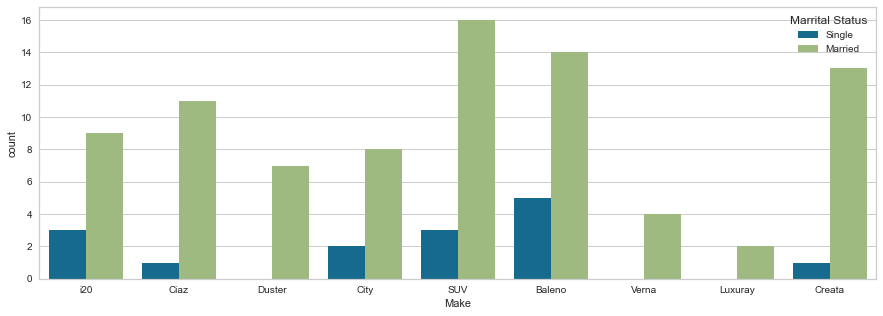

In [203]:
plt.figure(figsize=(15,5))
sns.countplot(x="Make", data=df, hue="Marrital Status")

<AxesSubplot:xlabel='Make', ylabel='count'>

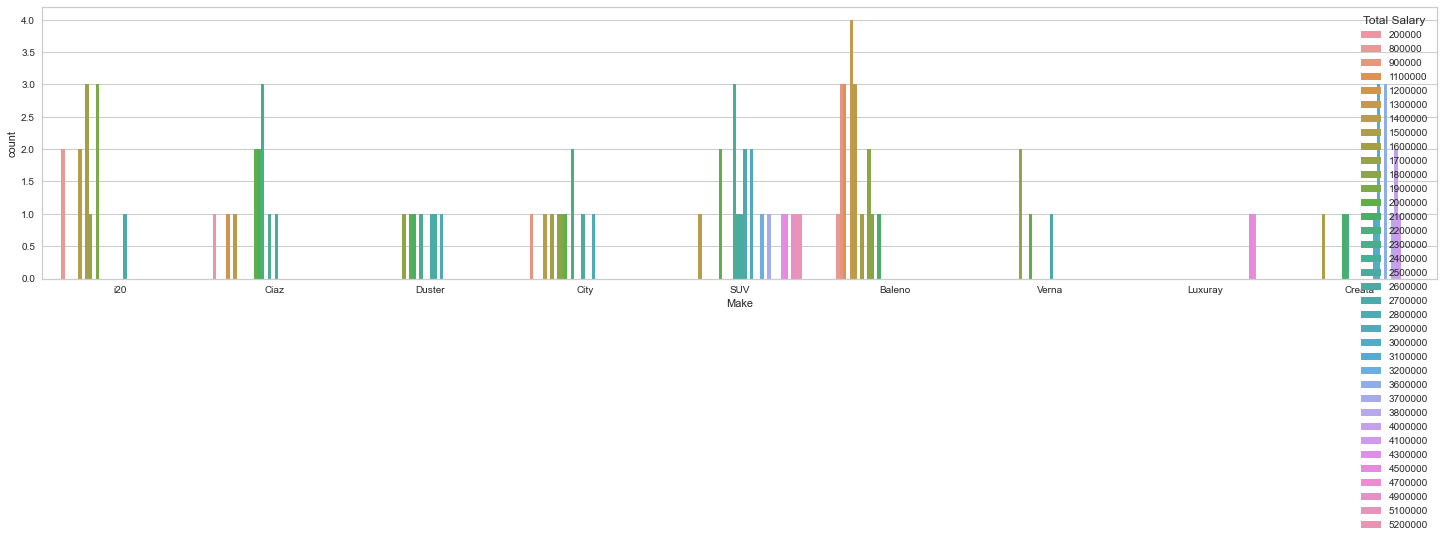

In [204]:
plt.figure(figsize=(25,5))
sns.countplot(x="Make", data=df, hue="Total Salary")

<AxesSubplot:xlabel='Make', ylabel='count'>

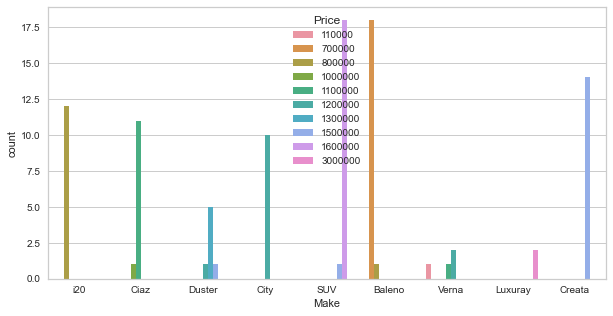

In [205]:
plt.figure(figsize=(10,5))
sns.countplot(x="Make", data=df, hue="Price")

<AxesSubplot:>

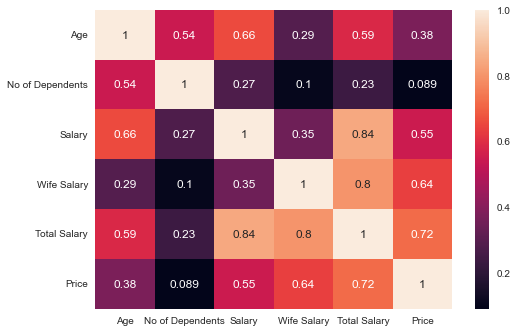

In [206]:
sns.heatmap(df.corr(), annot=True)

# Label Encoding and Normalization

In [207]:
Encode=preprocessing.OrdinalEncoder()
df.iloc[:,[1,2,3,5,6,7,11]]=Encode.fit_transform(df.iloc[:,[1,2,3,5,6,7,11]])
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1.0,1.0,1.0,0,1.0,0.0,0.0,800000,0,800000,8.0,800000
1,35,1.0,0.0,1.0,2,1.0,1.0,1.0,1400000,600000,2000000,1.0,1000000
2,45,0.0,0.0,0.0,4,1.0,1.0,0.0,1800000,0,1800000,4.0,1200000
3,41,0.0,0.0,1.0,3,0.0,0.0,1.0,1600000,600000,2200000,2.0,1200000
4,31,1.0,0.0,1.0,2,1.0,0.0,1.0,1800000,800000,2600000,6.0,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0.0,1.0,0.0,0,0.0,0.0,0.0,2400000,0,2400000,6.0,1600000
95,50,1.0,0.0,1.0,3,0.0,0.0,1.0,3800000,1300000,5100000,6.0,1600000
96,51,0.0,0.0,0.0,2,1.0,1.0,0.0,2200000,0,2200000,1.0,1100000
97,51,1.0,0.0,1.0,2,0.0,0.0,1.0,2700000,1300000,4000000,3.0,1500000


In [208]:
df.describe()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,9.900000e+01
mean,36.313131,0.646465,0.151515,0.565657,2.181818,0.323232,0.373737,0.525253,1.736364e+06,5.343434e+05,2.270707e+06,3.535354,1.194040e+06
std,6.246054,0.480500,0.360375,0.498193,1.335265,0.470091,0.486257,0.501903,6.736217e+05,6.054450e+05,1.050777e+06,2.767571,4.376955e+05
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,0.000000,1.100000e+05
25%,31.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.300000e+06,0.000000e+00,1.550000e+06,1.000000,8.000000e+05
50%,36.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.600000e+06,5.000000e+05,2.100000e+06,3.000000,1.200000e+06
75%,41.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.200000e+06,9.000000e+05,2.700000e+06,6.000000,1.500000e+06
max,51.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.800000e+06,2.100000e+06,5.200000e+06,8.000000,3.000000e+06


In [209]:
col=['Salary','Wife Salary','Total Salary','Price']
for i in col:
  x = df[i].values.reshape(-1, 1)
  scaler = MinMaxScaler()
  x_scaled = scaler.fit_transform(x)
  df[i]= x_scaled

In [210]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1.0,1.0,1.0,0,1.0,0.0,0.0,0.166667,0.000000,0.12,8.0,0.238754
1,35,1.0,0.0,1.0,2,1.0,1.0,1.0,0.333333,0.285714,0.36,1.0,0.307958
2,45,0.0,0.0,0.0,4,1.0,1.0,0.0,0.444444,0.000000,0.32,4.0,0.377163
3,41,0.0,0.0,1.0,3,0.0,0.0,1.0,0.388889,0.285714,0.40,2.0,0.377163
4,31,1.0,0.0,1.0,2,1.0,0.0,1.0,0.444444,0.380952,0.48,6.0,0.515571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0.0,1.0,0.0,0,0.0,0.0,0.0,0.611111,0.000000,0.44,6.0,0.515571
95,50,1.0,0.0,1.0,3,0.0,0.0,1.0,1.000000,0.619048,0.98,6.0,0.515571
96,51,0.0,0.0,0.0,2,1.0,1.0,0.0,0.555556,0.000000,0.40,1.0,0.342561
97,51,1.0,0.0,1.0,2,0.0,0.0,1.0,0.694444,0.619048,0.76,3.0,0.480969


# PCA 

In [211]:
#code for getting explained_variance_ratio
dim=[]
var=[]
for i in range(1,8):
    pca = PCA(n_components=i)
    pca.fit(df)
    var.append(pca.explained_variance_ratio_)
    dim.append(i)
var_new=var[6]

In [212]:
var_new

array([0.79397333, 0.15359848, 0.02580091, 0.00737349, 0.0063449 ,
       0.00535654, 0.00347581])

Text(0, 0.5, 'cumulative explained variance')

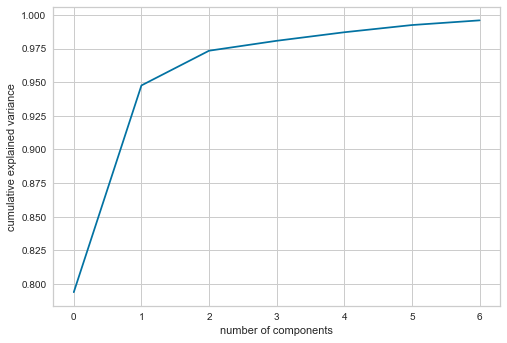

In [213]:
# b. Plotting explained_variance_ratio with dimension
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [214]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,99.0,-1.525155e-15,6.298110,-10.430367,-5.158083,-0.325908,4.699946,14.549429
col2,99.0,-1.256010e-16,2.770134,-3.821132,-2.556430,-0.535940,2.497672,4.702584
col3,99.0,3.588600e-16,1.135337,-2.132864,-1.049403,0.094485,0.861756,2.317417


In [216]:
import matplotlib as mpl
cmap = mpl.colormaps['viridis']

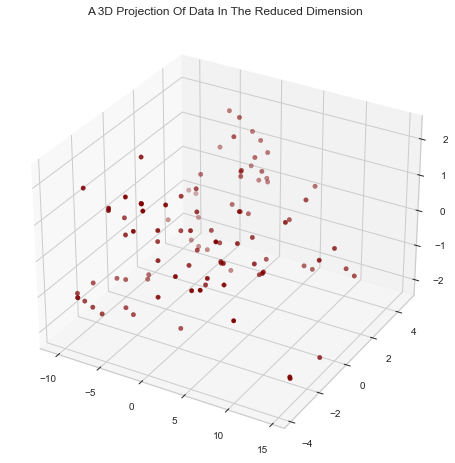

In [217]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o",cmap=cmap )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering 

#### Elbow method to find Optimal no. of Clusters

Elbow Method to determine the number of clusters to be formed:


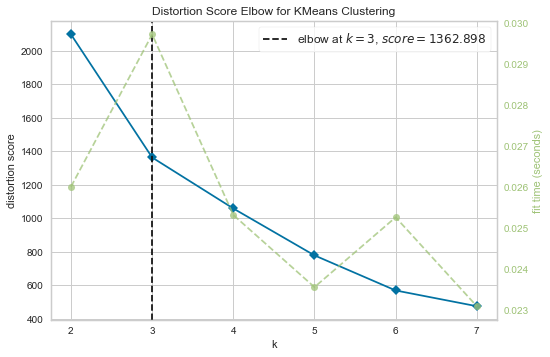

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [218]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=7)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Agglomerative Clustering with k=3

In [219]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

## Clusters Visualization

In [220]:
colormap = plt.cm.viridis

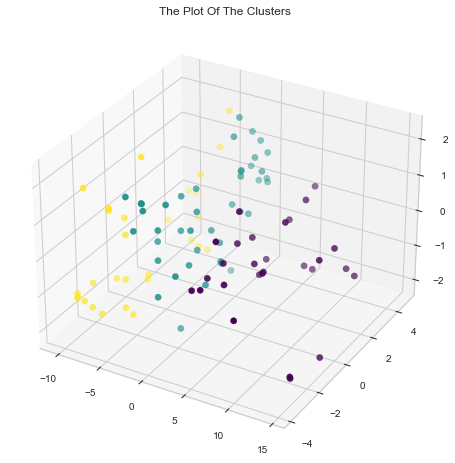

In [221]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o',cmap=colormap)
ax.set_title("The Plot Of The Clusters")
plt.show()

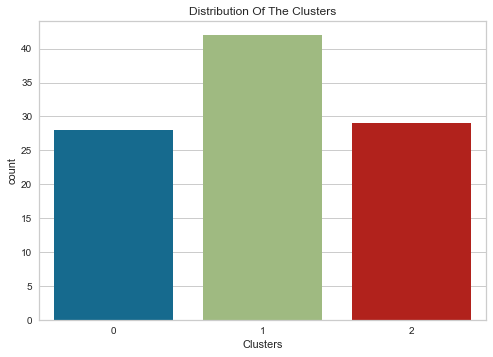

In [222]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

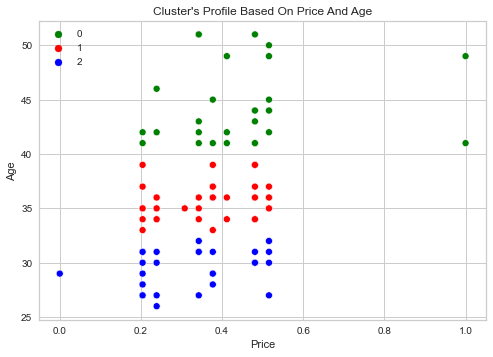

In [223]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Age"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Age")
plt.legend()
plt.show()

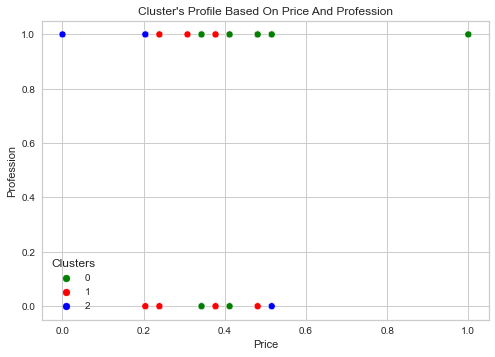

In [224]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Profession"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Profession")
plt.show()

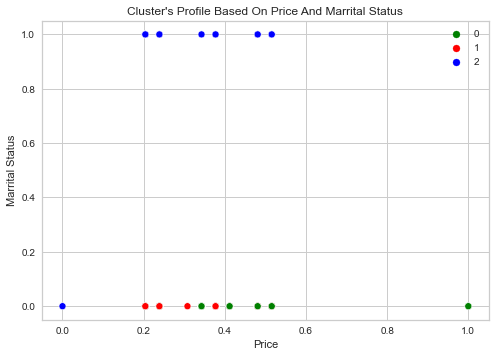

In [225]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Marrital Status"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Marrital Status")
plt.legend()
plt.show()

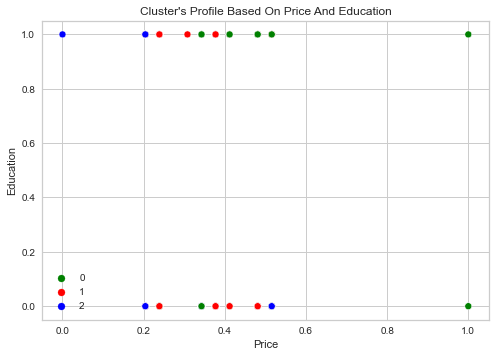

In [226]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Education"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Education")
plt.legend()
plt.show()

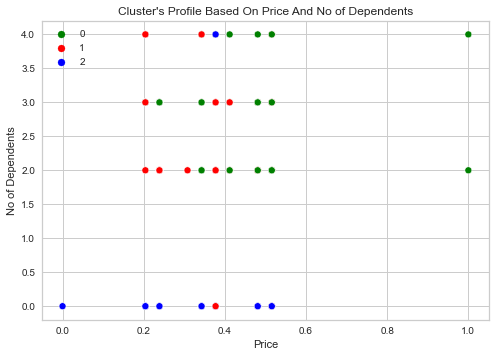

In [227]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["No of Dependents"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And No of Dependents")
plt.legend()
plt.show()

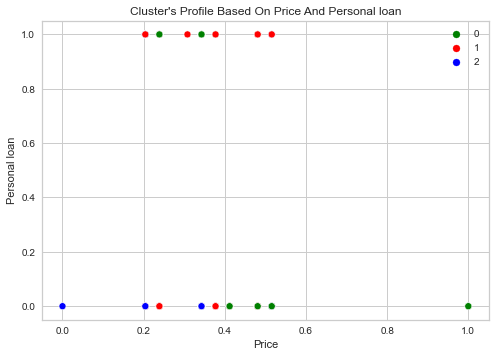

In [228]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Personal loan"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Personal loan")
plt.legend()
plt.show()

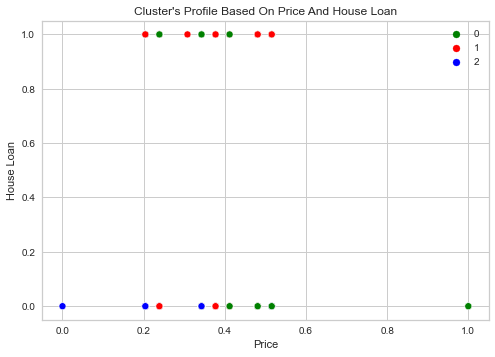

In [229]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["House Loan"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And House Loan")
plt.legend()
plt.show()

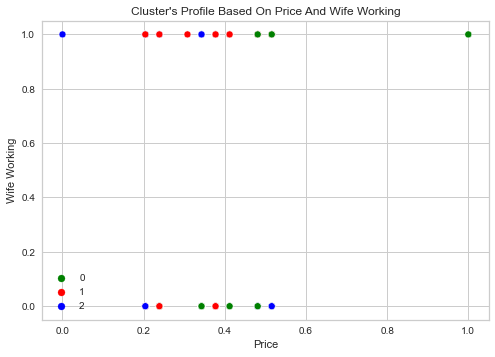

In [230]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Wife Working"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Wife Working")
plt.legend()
plt.show()

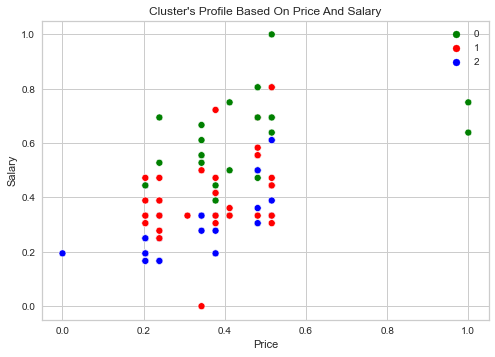

In [231]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Salary"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Salary")
plt.legend()
plt.show()

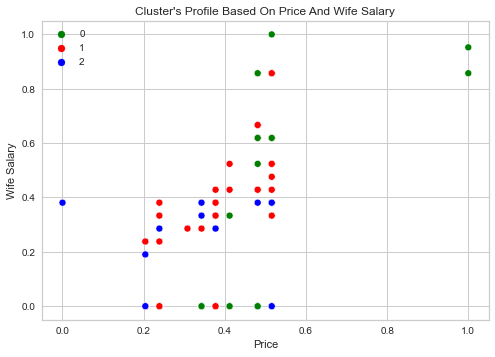

In [232]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Wife Salary"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Wife Salary")
plt.legend()
plt.show()

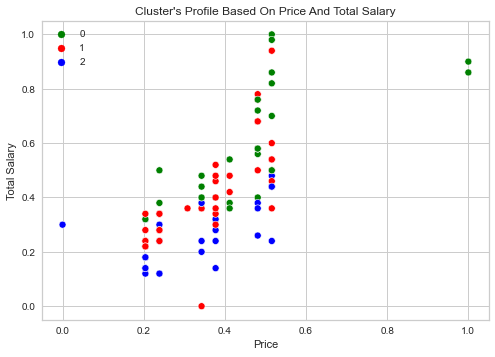

In [233]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Total Salary"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Total Salary")
plt.legend()
plt.show()

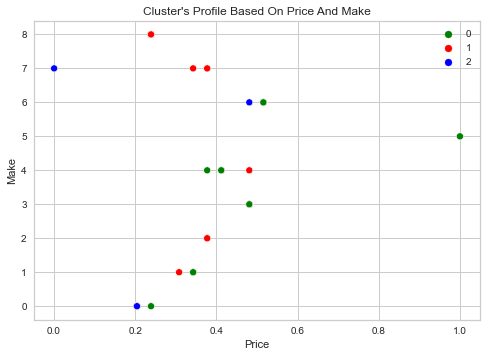

In [234]:
pl = sns.scatterplot(data = df,x=df["Price"], y=df["Make"],hue=df["Clusters"], palette= ['green','red','blue'])
pl.set_title("Cluster's Profile Based On Price And Make")
plt.legend()
plt.show()

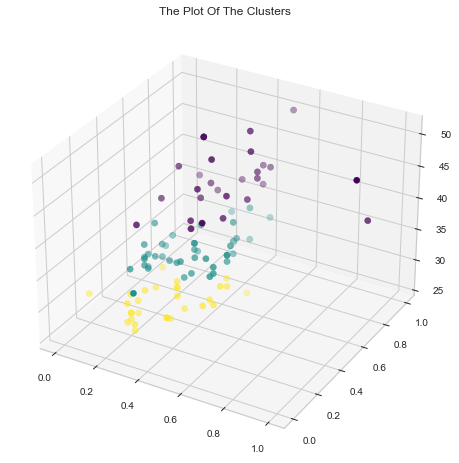

In [235]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df['Price'],df['Salary'],df['Age'], s=40, c=PCA_ds["Clusters"], marker='o',cmap=colormap)
ax.set_title("The Plot Of The Clusters")
plt.show()

## DBSCAN

In [236]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(PCA_ds)

DBSCAN()

In [237]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_ds)
distances, indices = nbrs.kneighbors(PCA_ds)

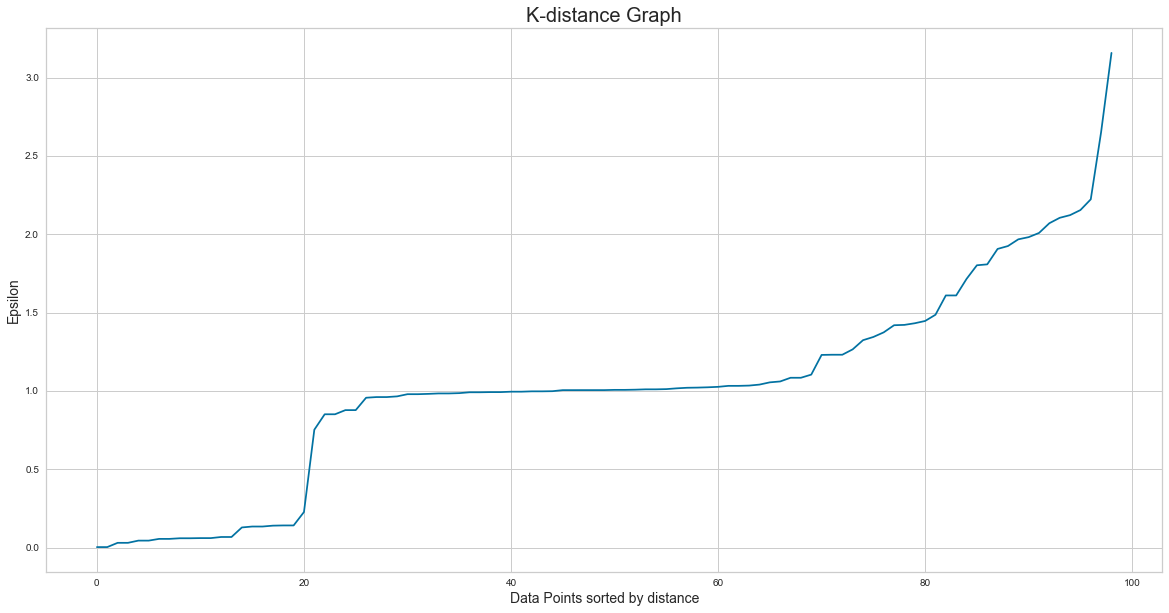

In [238]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [257]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=1.8,min_samples=6)
dbscan_opt.fit(PCA_ds)

DBSCAN(eps=1.8, min_samples=6)

In [258]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

-1    61
 0    17
 1     9
 3     7
 2     5
Name: DBSCAN_opt_labels, dtype: int64

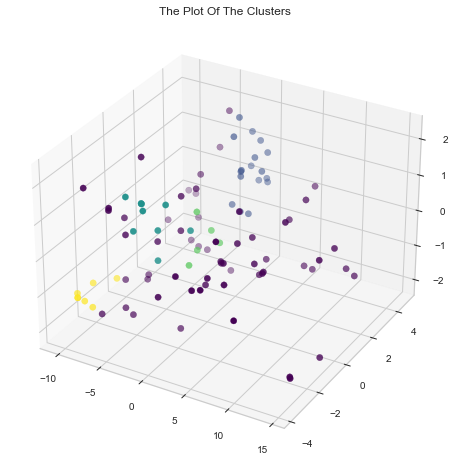

In [259]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df['DBSCAN_opt_labels'], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

In [261]:
print(set(df['DBSCAN_opt_labels']))

{0, 1, 2, 3, -1}


In [262]:
n_clusters=len(dbscan_opt.labels_)
print(metrics.silhouette_score(PCA_ds,dbscan_opt.labels_))

-0.02229076496719913
